# MNIST Analysis

In [29]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Download the dataset

In [3]:
mnist = fetch_openml('mnist_784', parser='auto')

## Exploratory analysis

In [4]:
mnist_keys = mnist.keys()
print(f'MNIST keys: {mnist_keys}')

MNIST keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
X, y = mnist['data'].values, mnist['target'].astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


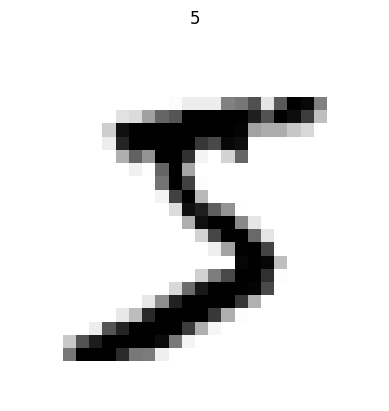

In [6]:
digit = X[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.title(y[0])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

## Training models

### Binary classifier

In [8]:
y_train_5 = (y_train == 5)

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)
sample_prediction = sgd_classifier.predict([digit])
print(sample_prediction)

[ True]


In [9]:
skfolds = StratifiedKFold(n_splits=3)

for train_indexes, test_indexes in skfolds.split(X_train, y_train_5):
    clone_sgd_classifier = clone(sgd_classifier)
    X_train_folds = X_train[train_indexes]
    y_train_folds = y_train_5[train_indexes]
    X_test_fold = X_train[test_indexes]
    y_test_fold = y_train_5[test_indexes]

    clone_sgd_classifier.fit(X_train_folds, y_train_folds)
    y_predicted = clone_sgd_classifier.predict(X_test_fold)
    correct_predictions = sum(y_predicted == y_test_fold)
    print(correct_predictions / len(y_predicted))

0.95035
0.96035
0.9604


In [10]:
cross_validation_score = cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(cross_validation_score)

[0.95035 0.96035 0.9604 ]


In [12]:
y_train_predicted = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
print(y_train_predicted)

[ True False False ...  True False False]


In [17]:
confusion_matrix = confusion_matrix(y_train_5, y_train_predicted)
print(confusion_matrix)

[[53892   687]
 [ 1891  3530]]


In [30]:
precision = precision_score(y_pred=y_train_predicted, y_true=y_train_5)
recall = recall_score(y_pred=y_train_predicted, y_true=y_train_5)
f1 = f1_score(y_pred=y_train_predicted, y_true=y_train_5)
print(f'Precision: {precision}', f'Recall: {recall}', f'F1: {f1}')

Precision: 0.8370879772350012 Recall: 0.6511713705958311 F1: 0.7325171197343846
